https://gym.openai.com/docs/

<div style=font-size:40px;>
Chapter 6
</div>



------------------------------------------------------------------------------------------------

<div style=font-size:20px;>
    
<b>6.1 Tabular TD(0) for estimating $V_\pi$ </b>

<div style=font-size:20px;>
    
Input: the policy π to be evaluated Algorithm parameter: step size α ∈ (0 , 1] <br>
Algorithm parameter: step size α ∈ (0 , 1] <br>
Initialize V ( s ), for all s ∈ 𝒮 + , arbitrarily except that V ( terminal ) = 0 <br>

&nbsp;&nbsp; Loop for each episode: <br>
&nbsp;&nbsp;&nbsp; Initialize S <br>
&nbsp;&nbsp;&nbsp; Loop for each step of episode: <br>
&nbsp;&nbsp;&nbsp; A ← action given by π for S <br>
&nbsp;&nbsp;&nbsp; Take action A , observe R , S′ <br>
&nbsp;&nbsp;&nbsp; V ( S ) ← V ( S ) + α [ R + γV ( S′ ) − V ( S ) ] <br>
&nbsp;&nbsp;&nbsp; S ← S′ <br>
&nbsp; until S is terminal <br>
    
</div>


    
<div style=font-size:20px;>
    
<b>6.4 Sarsa (on-policy TD control) for estimating Q ≈ $q_*$ </b>

Algorithm parameters: step size α ∈ (0 , 1] , small ε > 0 <br>
Initialize Q ( s, a ), for all s ∈ 𝒮 + , a ∈ 𝒜 ( s ), arbitrarily except that Q ( terminal , · ) = 0 <br>

Loop for each episode: <br>
&nbsp;&nbsp;Initialize S <br>
&nbsp;&nbsp;Choose A from S using policy derived from Q (e.g., ε greedy) <br>
&nbsp;&nbsp;Loop for each step of episode: <br>
&nbsp;&nbsp;&nbsp;&nbsp;Take action A , observe R , S ′ <br>
&nbsp;&nbsp;&nbsp;&nbsp;Choose A′ from S′ using policy derived from Q (e.g., ε greedy) <br>
&nbsp;&nbsp;&nbsp;&nbsp;Q ( S, A ) ← Q ( S, A ) + α [ R + γQ ( S′ , A′ ) − Q ( S, A ) ] <br>
&nbsp;&nbsp;&nbsp;&nbsp;S ← S′ ; A ← A′ ; <br>
&nbsp;&nbsp;until S is terminal <br>
    
</div>


<div style=font-size:20px;>
    
<b>6.5 Q-learning (off-policy TD control) for estimating $\pi$ $\approx$ $\pi_*$</b>

<div style=font-size:20px;>
    
Algorithm parameters: step size α ∈ (0 , 1] , small ε > 0 <br>
Initialize Q ( s, a ), for all s ∈ 𝒮 + , a ∈ 𝒜 ( s ), arbitrarily except that Q ( terminal , · ) = 0 <br>

Loop for each episode: <br>
&nbsp;&nbsp;Initialize S <br>
&nbsp;&nbsp;Loop for each step of episode: <br>
&nbsp;&nbsp;&nbsp;&nbsp;Choose A from S using policy derived from Q (e.g., ε greedy) <br>
&nbsp;&nbsp;&nbsp;&nbsp;Take action A , observe R , S' <br>
&nbsp;&nbsp;&nbsp;&nbsp;Q ( S, A ) ← Q ( S, A ) + α [ R + γ $max_a$ Q(S′ , a) − Q ( S, A ) ] <br>
&nbsp;&nbsp;&nbsp;&nbsp;S ← S'<br>
&nbsp;&nbsp;until S is terminal <br>
    
</div>


<div style=font-size:20px;>
As the player is learning from a random player taht plays randomly then optimal solution is not reached. Idealy the machine wojuld learn from an expert player. Boostarap the leatest layer wth the next game - iterative improvment.
<div>

------------

<div style=font-size:20px;>
The primary issue I see is that in the loop through time steps t in every training episode, you select actions for both players (who should have opposing goals to each other), but update a single q_table (which can only ever be correct for the "perspective" of one of your two players) on both of those actions, and updating both of them using a single, shared reward function.

Intuitively, I guess this means that your learning algorithm assumes that your opponent will always be helping you win, rather than assuming that your opponent plays optimally towards its own goals. You can see that this is likely indeed the case from your plot; you use 30,000
training episodes, split up into 15 chunks of 2,000 episodes per chunk for your plot. In your plot, you also very quickly reach a score of about 1,950 per chunk, which is almost the maximum possible! Now, I'm not 100% sure what the winrate of an optimal player against random would be, but I think it's likely that that should be lower than 1950 out of 2000. Random players will occasionally achieve draws in Tic-Tac-Toe, especially taking into consideration that your learning agent itself is also not playing optimally (but 𝜖

-greedily)!

You should instead pick one of the following solutions (maybe there are more solutions, this is just what I come up with on the spot):

    Keep track of two different tables of 𝑄

-values for the two different players, and update each of them only on half of the actions (each of them pretending that actions selected by the opponent are just stochastic state transitions created by "the environment" or "the world"). See this answer for more on what these scheme would look like.
Only keep track of a 𝑄
-value for your own agent (again only updating it on half the actions as described above -- specifically only on the actions your agent actually selected). Actions by the opposing player should then NOT be selected based on those same 𝑄-values, but instead by some different approach. You could for instance have opposing actions selected by a minimax or alpha-beta pruning search algorithm. Maybe selecting them to minimise instead of maximise values from the same 𝑄

    -table could also work (didn't think this idea fully through, not 100% sure). You probably could also just pick opponent actions randomly, but then your agent will only learn to play well against random opponents, not necessarily against strong opponents.

After looking into the above suggestions, you'll probably also want to look into making sure that your agent experiences games in which it starts as Player 1, as well as games in which it starts as Player 2, and trains for both of those possible scenarios and learns how to handle both of them. In your evaluation code (after training), I believe that you always make the Random opponent play first, and the trained agent play second? If you don't cover this scenario in your training episodes, your agent may not learn how to properly handle it.

Finally, a couple of small notes:

    Your discount factor 𝛾0.1

has an extremely small value. Common values in literature are values like 𝛾=0.9, 𝛾=0.95, or even 𝛾=0.99. Tic-Tac-Toe episodes tend to always be very short anyway, and we tend to not care too much about winning quickly rather than winning slowly (a win's a win), so I would tend to use a high value like 𝛾=0.99
.
A small programming tip, not really AI-specific: your code contains various conditions of the form if <condition> == True :, like: if done == True :. The == True part is redundant, and these conditions can be written more simply as just if done:.
    </div>

In [2]:
%reset -f

import timeit
from operator import attrgetter
import time
import matplotlib.pyplot
import pylab
from collections import Counter
import logging.handlers
import sys
import configparser
import logging.handlers
import unittest
import json, hmac, hashlib, time, requests, base64
from requests.auth import AuthBase
from pandas.io.json import json_normalize
from multiprocessing.dummy import Pool as ThreadPool
import threading
import time
from statistics import mean 
import statistics as st
import os   
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import pandas as pd
from functools import reduce
from ast import literal_eval
import unittest
import math
from datetime import date, timedelta
import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import io
import base64

class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 0px;
        border: 0px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

# Q Learning and SARSA Setup Code

In [4]:
today = datetime.today()
model_execution_start_time = str(today.year)+"-"+str(today.month)+"-"+str(today.day)+" "+str(today.hour)+":"+str(today.minute)+":"+str(today.second)
epsilon = .1 # <1> Controls the exploration/exploitation tradeoff of e greedy
discount = .1  # <2> Discount value, varies between 0 and 1
step_size= .1  # <3> The learning rate of temporal difference update function
number_episodes = 30000 # <4> The number of tic tac toe games to play

def epsilon_greedy(epsilon, state, q_table) : 
    
    def get_valid_index(state):
        i = 0
        valid_index = []
        for a in state :          
            if a == '-' : 
                valid_index.append(i)
            i = i + 1
        return valid_index
    
    def get_arg_max_sub(values , indices) : 
        return max(list(zip(np.array(values)[indices],indices)),key=lambda item:item[0])[1]
    
    if np.random.rand() < epsilon: 
        return random.choice(get_valid_index(state))
    else :
        if state not in q_table : 
            q_table[state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
        q_row = q_table[state]
        return get_arg_max_sub(q_row , get_valid_index(state))
    
def make_move(current_player, current_state , action):
    if current_player == 'X':
        return current_state[:action] + 'X' + current_state[action+1:]
    else : 
        return current_state[:action] + 'O' + current_state[action+1:]

q_table = {} # <5> The q table used to store the value for each state
max_steps = 9 # <6> the maximum nomber of moves per game is 9
reward_per_episode = [] # <7> Maintain a list of reward attained for each episode       
reward = []

def get_other_player(p): # <8> Just return the other player name for the current player
    if p == 'X':
        return 'O'
    else : 
        return 'X'
    
def win_by_diagonal(mark , board): # <9> Determine if a win has occured by a diaganol match
    return (board[0] == mark and board[4] == mark and board[8] == mark) or (board[2] == mark and board[4] == mark and board[6] == mark)
    
def win_by_vertical(mark , board): # <10> Determine if a win has occured by a vertical match
    return (board[0] == mark and board[3] == mark and board[6] == mark) or (board[1] == mark and board[4] == mark and board[7] == mark) or (board[2] == mark and board[5] == mark and board[8]== mark)

def win_by_horizontal(mark , board): # <11> Determine if a win has occured by a horizontal match
    return (board[0] == mark and board[1] == mark and board[2] == mark) or (board[3] == mark and board[4] == mark and board[5] == mark) or (board[6] == mark and board[7] == mark and board[8] == mark)

def win(mark , board): # <12> Determine if a win has occured
    return win_by_diagonal(mark, board) or win_by_vertical(mark, board) or win_by_horizontal(mark, board)

def draw(board): # <13> Determine if a drawn match has occured
    return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)

s = []
rewards = []
def get_reward(state): # <14> Return the reward for a given state
    reward = 0
    if win('X' ,list(state)): 
        reward = 1 # <15> +1 reward if RL agent wins a game
        rewards.append(reward)
    elif draw(state) :
        reward = -1 # <16> -1 reward if RL agent loses a game
        rewards.append(reward)
    else :
        reward = 0 # <17> Do not assign positive or negative reward if RL agent draws with random player
        rewards.append(reward)
        
    return reward

def get_done(state):
    return win('X' ,list(state)) or win('O' , list(state)) or draw(list(state)) or (state.count('-') == 0)

# Q Learning

In [5]:
q_table = {}
max_steps = 9
reward_per_episode = []            
reward = []
cummulative_reward = []

today = datetime.today()
model_execution_start_time = str(today.year)+"-"+str(today.month)+"-"+str(today.day)+" "+str(today.hour)+":"+str(today.minute)+":"+str(today.second)
epsilon = .1 # <> Controls the exploration/exploitation tradeoff of e greedy
discount = .1  # <> Discount value, varies between 0 and 1
step_size= .1  # <> The learning rate of 
number_episodes = 30000 # <> The number of tic tac toe games to play

def epsilon_greedy(epsilon, state, q_table) : 
    
    def get_valid_index(state):
        i = 0
        valid_index = []
        for a in state :          
            if a == '-' : # <> If a move
                valid_index.append(i)
            i = i + 1
        return valid_index
    
    def get_arg_max_sub(values , indices) : 
        return max(list(zip(np.array(values)[indices],indices)),key=lambda item:item[0])[1]
    
    if np.random.rand() < epsilon: # <5>
        return random.choice(get_valid_index(state))
    else :
        if state not in q_table : 
            q_table[state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
        q_row = q_table[state]
        return get_arg_max_sub(q_row , get_valid_index(state))
    
def make_move(current_player, current_state , action):
    if current_player == 'X':
        return current_state[:action] + 'X' + current_state[action+1:]
    else : 
        return current_state[:action] + 'O' + current_state[action+1:]

q_table = {} # <> The q table used to store the value for each state
max_steps = 9 # <> the maximum nomber of moves per game is 9
reward_per_episode = [] # <> Maintain a list of reward attained for each episode       
reward = []

def get_other_player(p): # <> Just return the other player name for the current player
    if p == 'X':
        return 'O'
    else : 
        return 'X'
    
def win_by_diagonal(mark , board): # <> Determine if a win has occured by a diaganol match
    return (board[0] == mark and board[4] == mark and board[8] == mark) or (board[2] == mark and board[4] == mark and board[6] == mark)
    
def win_by_vertical(mark , board): # <> Determine if a win has occured by a vertical match
    return (board[0] == mark and board[3] == mark and board[6] == mark) or (board[1] == mark and board[4] == mark and board[7] == mark) or (board[2] == mark and board[5] == mark and board[8]== mark)

def win_by_horizontal(mark , board): # <> Determine if a win has occured by a horizontal match
    return (board[0] == mark and board[1] == mark and board[2] == mark) or (board[3] == mark and board[4] == mark and board[5] == mark) or (board[6] == mark and board[7] == mark and board[8] == mark)

def win(mark , board): # <> Determine if a win has occured
    return win_by_diagonal(mark, board) or win_by_vertical(mark, board) or win_by_horizontal(mark, board)

def draw(board): # <> Determine if a drawn match has occured
    return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)

s = []
rewards = []
def get_reward(state): # <> Return the reward for a given state
    reward = 0
    if win('X' ,list(state)): 
        reward = 1 # <> +1 reward if RL agent wins a game
        rewards.append(reward)
    elif draw(state) :
        reward = -1 # <> -1 reward if RL agent loses a game
        rewards.append(reward)
    else :
        reward = 0 # <> Do not assign positive or negative reward if RL agent draws with random player
        rewards.append(reward)
        
    return reward

def get_done(state):
    return win('X' ,list(state)) or win('O' , list(state)) or draw(list(state)) or (state.count('-') == 0)
def q_learning():
    
    total_reward = 0
    
    for episode in range(0 , number_episodes) :
        t = 0
        state = '---------' # <> Set the initial empty state to '---------', each '-' represents a move has not beed made for the given position

        player = 'X'
        random_player = 'O'


        if episode % 10000 == 0:
            print('in episode:',episode)

        done = False
        episode_reward = 0
            
        while t < max_steps:

            t = t + 1

            action = epsilon_greedy(epsilon , state , q_table)

            done = get_done(state)

            if done == True : 
                break

            if state not in q_table : 
                q_table[state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]) # <> Set the Q values for the next state if the state does not yet exist in Q lookup table

            next_state = make_move(player , state , action)
            reward = get_reward(next_state)
            episode_reward = episode_reward + reward
            total_reward = total_reward + reward
            done = get_done(next_state)

            if done == True : # <> if the game is over
                q_table[state][action] = q_table[state][action] + (step_size * (reward - q_table[state][action]))
                break

            next_action = epsilon_greedy(epsilon , next_state , q_table)
            if next_state not in q_table : 
                q_table[next_state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]) # <> Set the Q values for the next state if the state does not yet exist in Q lookup table

            q_table[state][action] = q_table[state][action] + (step_size * (reward + (discount * np.max(q_table[next_state]) - q_table[state][action]))) # <> Q learning temporal difference update function

            state = next_state

            player = get_other_player(player)
            
        reward_per_episode.append(episode_reward)
        cummulative_reward.append(total_reward)

q_learning()

in episode: 0
in episode: 10000
in episode: 20000



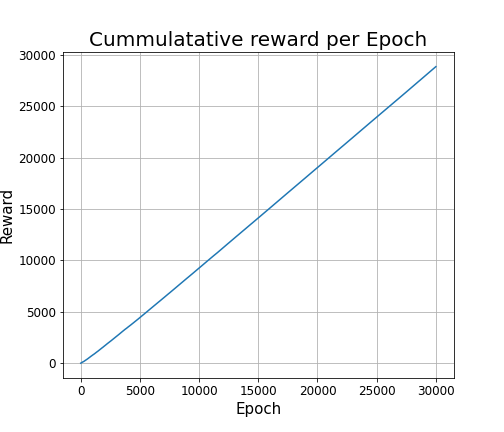
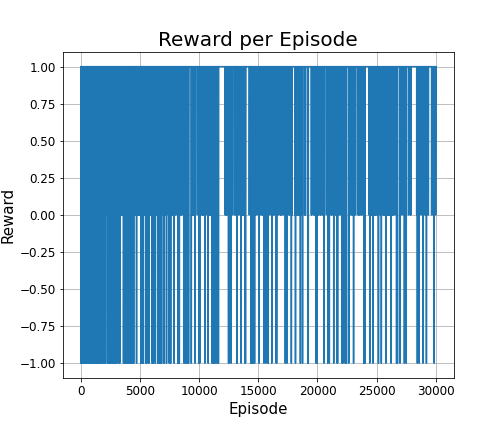
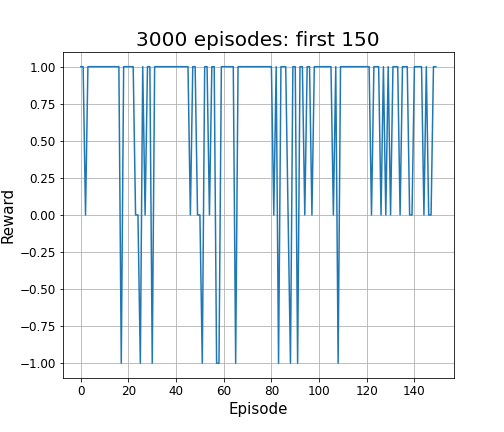
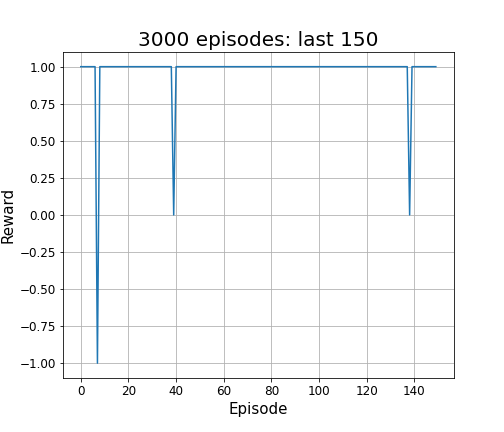
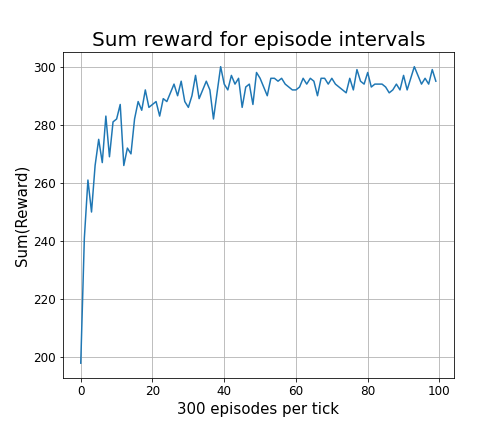

In [6]:

oPlot = FlowLayout() # create an empty FlowLayout

fig_size = (7,6)
header_font_size = 20

x_tick_size = 12
y_tick_size = 12

plt.rc('xtick', labelsize=x_tick_size) 
plt.rc('ytick', labelsize=y_tick_size)


fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Cummulatative reward per Epoch" , fontsize=header_font_size)
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.set_xlabel('Epoch', fontsize = 15.0) 

ax.plot(cummulative_reward)
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Reward per Episode" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.plot(reward_per_episode)
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("3000 episodes: first 150" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.plot(reward_per_episode[:150])
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("3000 episodes: last 150" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
# ax.set_xlim([2850, 3000])
ax.plot(reward_per_episode[-150:])
ax.grid()
oPlot.add_plot(ax)
plt.close()

# The reward sum is taken per 100 episodes - this provides a clearer view of how reward is increasing overtime for all episodes.
fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Sum reward for episode intervals" , fontsize=header_font_size)
ax.set_xlabel('300 episodes per tick', fontsize = 15.0) 
ax.set_ylabel('Sum(Reward)', fontsize = 15.0) 
ax.grid()
ax.plot([sum(i) for i in np.array_split(reward_per_episode, 100)])
oPlot.add_plot(ax)

plt.close()

oPlot.PassHtmlToCell()

In [7]:
## Computer opponent that makes random moves against trained RL computer opponent
# Random takes move for player marking O position
# RL agent takes move for player marking X position

def draw(board):
    return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)

x_win = []
o_win = []
draw_games = []
number_games = 50000

c = []
o = []

for ii in range (0 , number_games):
    
    if ii % 10000 == 0 and ii > 0:
        print('In game ',ii)
        print('The number of X game wins' , sum(x_win))
        print('The number of O game wins' , sum(o_win))
        print('The number of drawn games' , sum(draw_games))

    available_moves = [0,1,2,3,4,5,6,7,8]
    current_game_state = '---------'
    
    computer = ''
    random_player = ''
    
    computer = 'X'
    random_player = 'O'

    def draw(board):
        return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)
        
    number_moves = 0
    
    for i in range(0 , 5):

        randomer_move = random.choice(available_moves)
        number_moves = number_moves + 1
        current_game_state = current_game_state[:randomer_move] + random_player + current_game_state[randomer_move+1:]
        available_moves.remove(randomer_move)

        if number_moves == 9 : 
            draw_games.append(1)
            break
        if win('O' , list(current_game_state)) == True:
            o_win.append(1)
            break
        elif win('X' , list(current_game_state)) == True:
            x_win.append(1)
            break
        elif draw(current_game_state) == True:
            draw_games.append(1)
            break
            
        computer_move_pos = epsilon_greedy(-1, current_game_state, q_table)
        number_moves = number_moves + 1
        current_game_state = current_game_state[:computer_move_pos] + computer + current_game_state[computer_move_pos+1:]
        available_moves.remove(computer_move_pos)
     
        if number_moves == 9 : 
            draw_games.append(1)
            break
            
        if win('O' , list(current_game_state)) == True:
            o_win.append(1)
            break
        elif win('X' , list(current_game_state)) == True:
            x_win.append(1)
            break
        elif draw(current_game_state) == True:
            draw_games.append(1)
            break
            


In game  10000
The number of X game wins 4404
The number of O game wins 2974
The number of drawn games 2622
In game  20000
The number of X game wins 8826
The number of O game wins 5946
The number of drawn games 5228
In game  30000
The number of X game wins 13198
The number of O game wins 8953
The number of drawn games 7849
In game  40000
The number of X game wins 17612
The number of O game wins 12020
The number of drawn games 10368


In [8]:
print('number_games:' , number_games)
print('The number of X game wins' , sum(x_win))
print('The number of O game wins' , sum(o_win))
print('The number of drawn games' , sum(draw_games))
        

number_games: 50000
The number of X game wins 22004
The number of O game wins 14992
The number of drawn games 13004


# SARSA

In [9]:
q_table = {}
max_steps = 9
reward_per_episode = []            
reward = []
cummulative_reward = []

def sarsa():
    
    total_reward = 0
    
    for episode in range(0 , number_episodes) :
        t = 0
        state = '---------' # <> Set the initial empty state to '---------', each '-' represents a move has not beed made for the given position

        player = 'X' # <> RL agent always plays 'X' moves
        random_player = 'O' # <> Random player always play 'O' moves

        action = epsilon_greedy(epsilon , state , q_table)
        if episode % 10000 == 0:
            print('in episode:',episode)

        done = False
        episode_reward = 0
        
        while t < max_steps:

            t = t + 1

            done = get_done(state)

            if done == True : 
                break

            if state not in q_table : 
                q_table[state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]) # <> Set the Q values for the next state if the state does not yet exist in Q lookup table

            next_state = make_move(player , state , action)
            reward = get_reward(next_state)
            episode_reward = episode_reward + reward
            total_reward = total_reward + reward
            cummulative_reward.append(total_reward)
            
            done = get_done(next_state)

            if done == True :
                q_table[state][action] = q_table[state][action] + (step_size * (reward - q_table[state][action]))
                break

            next_action = epsilon_greedy(epsilon , next_state , q_table)
            if next_state not in q_table : 
                q_table[next_state] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]) # <> Set the Q values for the next state if the state does not yet exist in Q lookup table

            q_table[state][action] = q_table[state][action] + (step_size * (reward + (discount * q_table[next_state][next_action]) - q_table[state][action])) # <> SARSA temporal difference update function

            state, action = next_state, next_action

            player = get_other_player(player)
            
        reward_per_episode.append(episode_reward)
        
sarsa()

in episode: 0
in episode: 10000
in episode: 20000



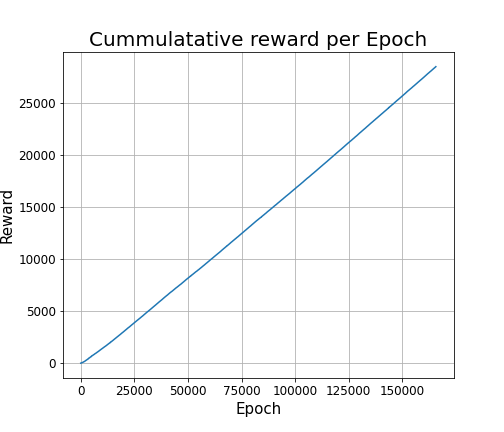
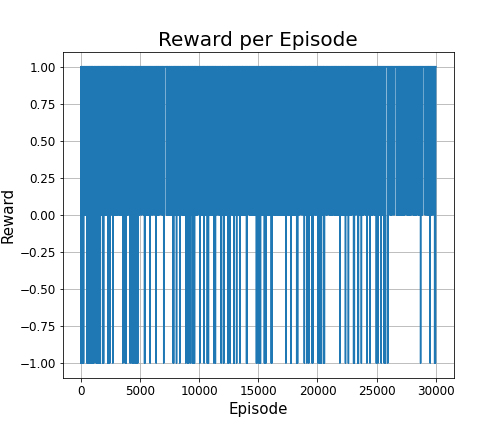
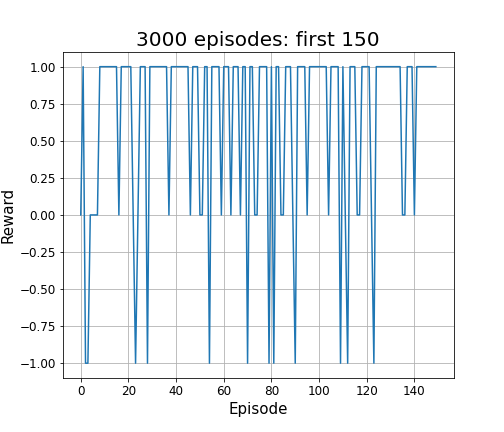
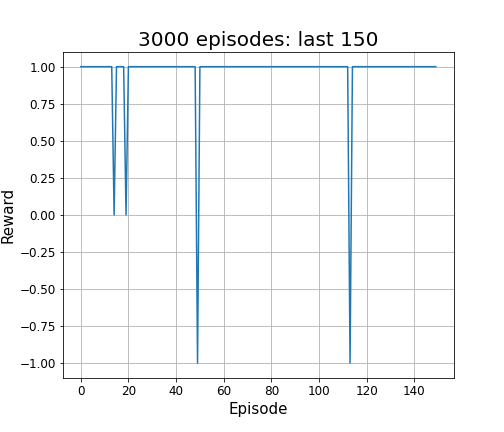
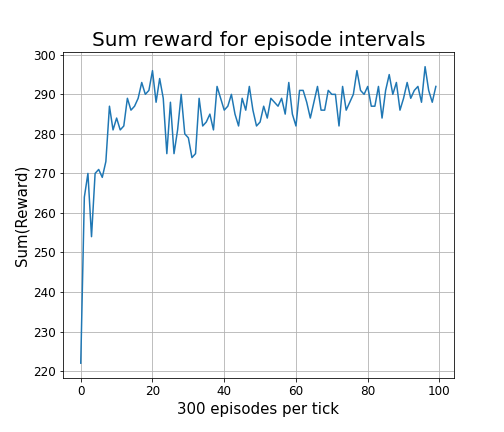

In [30]:

oPlot = FlowLayout() # create an empty FlowLayout

fig_size = (7,6)
header_font_size = 20

x_tick_size = 12
y_tick_size = 12

plt.rc('xtick', labelsize=x_tick_size) 
plt.rc('ytick', labelsize=y_tick_size)


fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Cummulatative reward per Epoch" , fontsize=header_font_size)
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.set_xlabel('Epoch', fontsize = 15.0) 

ax.plot(cummulative_reward)
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Reward per Episode" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.plot(reward_per_episode)
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("3000 episodes: first 150" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
ax.plot(reward_per_episode[:150])
ax.grid()
oPlot.add_plot(ax)
plt.close()

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("3000 episodes: last 150" , fontsize=header_font_size)
ax.set_xlabel('Episode', fontsize = 15.0) 
ax.set_ylabel('Reward', fontsize = 15.0) 
# ax.set_xlim([2850, 3000])
ax.plot(reward_per_episode[-150:])
ax.grid()
oPlot.add_plot(ax)
plt.close()

# The reward sum is taken per 100 episodes - this provides a clearer view of how reward is increasing overtime for all episodes.
fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.set_title("Sum reward for episode intervals" , fontsize=header_font_size)
ax.set_xlabel('300 episodes per tick', fontsize = 15.0) 
ax.set_ylabel('Sum(Reward)', fontsize = 15.0) 
ax.grid()
ax.plot([sum(i) for i in np.array_split(reward_per_episode, 100)])
oPlot.add_plot(ax)

plt.close()

oPlot.PassHtmlToCell()

In [31]:
# plt.grid()
# plt.plot(cummulative_reward)

In [32]:
# plt.grid()
# plt.plot([sum(i) for i in np.array_split(reward_per_episode, 15)])

In [12]:
## Computer opponent that makes random moves against trained RL computer opponent
# Random takes move for player marking O position
# RL agent takes move for player marking X position

def draw(board):
    return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)

x_win = []
o_win = []
draw_games = []
number_games = 50000

c = []
o = []

for ii in range (0 , number_games):
    
    if ii % 10000 == 0 and ii > 0:
        print('In game ',ii)
        print('The number of X game wins' , sum(x_win))
        print('The number of O game wins' , sum(o_win))
        print('The number of drawn games' , sum(draw_games))

    available_moves = [0,1,2,3,4,5,6,7,8]
    current_game_state = '---------'
    
    computer = ''
    random_player = ''
    
    computer = 'X'
    random_player = 'O'

    def draw(board):
        return win('X' , list(board)) == False and win('O' , list(board)) == False and (list(board).count('-') == 0)
        
    number_moves = 0
    
    for i in range(0 , 5):

        randomer_move = random.choice(available_moves)
        number_moves = number_moves + 1
        current_game_state = current_game_state[:randomer_move] + random_player + current_game_state[randomer_move+1:]
        available_moves.remove(randomer_move)

        if number_moves == 9 : 
            draw_games.append(1)
            break
        if win('O' , list(current_game_state)) == True:
            o_win.append(1)
            break
        elif win('X' , list(current_game_state)) == True:
            x_win.append(1)
            break
        elif draw(current_game_state) == True:
            draw_games.append(1)
            break
            
        computer_move_pos = epsilon_greedy(-1, current_game_state, q_table)
        number_moves = number_moves + 1
        current_game_state = current_game_state[:computer_move_pos] + computer + current_game_state[computer_move_pos+1:]
        available_moves.remove(computer_move_pos)
     
        if number_moves == 9 : 
            draw_games.append(1)
#             print(current_game_state)
            break
            
        if win('O' , list(current_game_state)) == True:
            o_win.append(1)
            break
        elif win('X' , list(current_game_state)) == True:
            x_win.append(1)
            break
        elif draw(current_game_state) == True:
            draw_games.append(1)
            break
            


In game  10000
The number of X game wins 4387
The number of O game wins 3001
The number of drawn games 2612
In game  20000
The number of X game wins 8740
The number of O game wins 6060
The number of drawn games 5200
In game  30000
The number of X game wins 13103
The number of O game wins 9050
The number of drawn games 7847
In game  40000
The number of X game wins 17591
The number of O game wins 12014
The number of drawn games 10395


In [13]:
print('number_games:' , number_games)
print('The number of X game wins' , sum(x_win))
print('The number of O game wins' , sum(o_win))
print('The number of drawn games' , sum(draw_games))
        

number_games: 50000
The number of X game wins 21933
The number of O game wins 15118
The number of drawn games 12949


In [14]:
d = {}
d['reward_per_episode'] = reward_per_episode
d['model_execution_start_time'] = model_execution_start_time


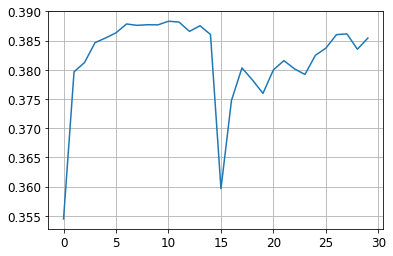

In [19]:
plt.grid()
plt.plot([np.std(i) for i in np.array_split(rewards, 30)])

# Average Reward

In [20]:
round(sum(rewards) / len(rewards) , 3)

0.174

In [21]:
def is_board_position_valid(board):
    return abs(abs(board.count('O')) - abs(board.count('X'))) <= 1

for b in list(q_table.keys()):
    if is_board_position_valid(b) == False :
        print('not valid')

In [22]:
print('The number of X game wins' , sum(x_win))
print('The number of O game wins' , sum(o_win))
print('The number of drawn games' , sum(draw_games))
print('Total games:',sum(x_win)+sum(o_win)+sum(draw_games))

The number of X game wins 21933
The number of O game wins 15118
The number of drawn games 12949
Total games: 50000


In [23]:
win('X' , list('XXXXXOXOX'))

True

In [24]:


draw('XOXOXOXXX')

False

In [25]:
def format_float(num):
    return np.format_float_positional(num, trim='-')

# v = [format_float(s) for s in list(q_table.values())]

v = []
for s in list(q_table.values()) : 
    temp = []
    for d in s : 
        temp.append(np.format_float_positional(d))
    v.append(temp)
    
q_table_data = [str(a[0].replace('[' , '').replace(']' , '') + ',' + str(a[1]).replace('[' , '').replace(']' , '')) for a in list(zip(list(q_table.keys()) , v))]

f = open("q_table.txt","w")
f.write( str(q_table_data) )
f.close()


In [26]:
epsilon_greedy(0 , current_game_state, q_table)

3

In [27]:
max(list(zip(np.array([-0.3 , 0.  , 0. ,  0. ,  0. ,  0.  , 0. ,  0. ,  0. ])[[2, 4, 6]],[2, 4, 6])),key=lambda item:item[0])[1]

2

In [28]:
print('Computer player played X',sum(c),'times')
print('Computer player played O',sum(o),'times')

Computer player played X 0 times
Computer player played O 0 times


In game  0
The number of X game wins 0
The number of O game wins 0
In game  10000
The number of X game wins 4214
The number of O game wins 9400
In game  20000
The number of X game wins 8438
The number of O game wins 18968
In game  30000
The number of X game wins 12751
The number of O game wins 28436
In game  40000
The number of X game wins 16950
The number of O game wins 37872

In [29]:
win('X' , list('XXOXXOOOX'))



True